# Importing Libraries

In [10]:
import numpy as np
import tensorflow as tf
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


# Notes
num_samples = 100
image_shape = (64, 64, 3)
quantum_data_shape = (64,)

# Loading and Preprocessing data

In [11]:
# Load and preprocess data from subfolders
def load_data(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    for class_index, class_name in enumerate(class_names):
        class_path = os.path.join(folder, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (64,64))
            images.append(image)
            labels.append(class_index)
    return images, labels

# Load and preprocess image data
images, labels = load_data('Retinopath_images\data')

# Split data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Normalize pixel values to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Print shapes for verification
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (5182, 64, 64, 3)
Train labels shape: (5182,)
Test images shape: (1296, 64, 64, 3)
Test labels shape: (1296,)


# Implementing Quantum circuit

In [12]:
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble


def create_quantum_circuit(image_features):
    num_features = len(image_features)
    quantum_register = QuantumCircuit(num_features, num_features)  # Define quantum and classical registers
    
    # Apply quantum operations to encode image features into quantum states
    for i in range(num_features):
        # Convert array to scalar (taking the mean of pixel values for simplicity)
        value = np.mean(image_features[i])
        
        # Scale the value to a suitable range for quantum gates (e.g., [0, pi])
        scaled_value = value * np.pi / 255.0
        
        # Apply rotation gate based on scaled feature value
        quantum_register.ry(scaled_value, i)
        
    quantum_register.measure_all()
        
    return quantum_register

#  Quantum-assisted deep learning


In [13]:
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble

def qsdl(set1):
    train_q = set1
    #train_q = set1

    # Create an array to store the measurement outcomes
    num_images = len(train_q)  
    num_qubits = 6  # Number of qubits
    num_outcomes = 2 ** num_qubits  # Possible outcomes for 6 qubits

    quantum_data = np.zeros((num_images, num_outcomes), dtype=int)

    # Simulate each quantum circuit and store measurement outcomes
    simulator = Aer.get_backend('aer_simulator')
    for i, image_features in enumerate(train_q):
        qc = create_quantum_circuit(image_features)
        compiled_circuit = transpile(qc, simulator)
        qobj = assemble(compiled_circuit)
        result = simulator.run(qobj).result()
        counts = result.get_counts()


        for outcome, count in counts.items():
            original_string = outcome
            without_spaces = "".join(original_string.split())
            outcome_int = int(without_spaces, 2)

            if outcome_int < num_outcomes:
                quantum_data[i, outcome_int] = count

    # Print the quantum data array
    print("Quantum data created")
    return quantum_data
    #print(quantum_data)


# Implementing CNN

In [130]:
# Define the CNN model
cnn_input = tf.keras.layers.Input(shape=image_shape)
cnn_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(cnn_input)

cnn_flatten = tf.keras.layers.Flatten()(cnn_layer)

# Define the quantum data input
quantum_input = tf.keras.layers.Input(shape=quantum_data_shape)

# Combine CNN and quantum data
combined = tf.keras.layers.Concatenate()([cnn_flatten, quantum_input])

# Fully connected layers

dense1 = tf.keras.layers.Dense(128, activation='relu')(combined)
output = tf.keras.layers.Dense(5, activation='softmax')(dense1)

# Create the model
model = tf.keras.models.Model(inputs=[cnn_input, quantum_input], outputs=output)



# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_31 (InputLayer)       [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d_14 (Conv2D)          (None, 62, 62, 32)           896       ['input_31[0][0]']            
                                                                                                  
 flatten_14 (Flatten)        (None, 123008)               0         ['conv2d_14[0][0]']           
                                                                                                  
 input_32 (InputLayer)       [(None, 64)]                 0         []                            
                                                                                           

# Fitting or Training the model

In [131]:
quantum_data=qsdl(train_images[:])

Quantum data created


In [132]:
# Train the model

print("quantum data created for training images")

#history=model.fit([train_images, quantum_data], train_labels, epochs=10, batch_size=32)
history=model.fit([train_images[:], quantum_data[:]], train_labels[:], epochs=40, batch_size=32)

quantum data created for training images
Epoch 1/40
162/162 [==============================] - 58s 333ms/step - loss: 1.9166 - accuracy: 0.4711
Epoch 2/40
162/162 [==============================] - 51s 313ms/step - loss: 1.0221 - accuracy: 0.5847
Epoch 3/40
162/162 [==============================] - 52s 323ms/step - loss: 0.9526 - accuracy: 0.6198
Epoch 4/40
162/162 [==============================] - 51s 317ms/step - loss: 0.8779 - accuracy: 0.6517
Epoch 5/40
162/162 [==============================] - 53s 327ms/step - loss: 0.7873 - accuracy: 0.6932
Epoch 6/40
162/162 [==============================] - 40s 244ms/step - loss: 0.7452 - accuracy: 0.7165
Epoch 7/40
162/162 [==============================] - 40s 248ms/step - loss: 0.6563 - accuracy: 0.7540
Epoch 8/40
162/162 [==============================] - 39s 240ms/step - loss: 0.5938 - accuracy: 0.7756
Epoch 9/40
162/162 [==============================] - 38s 238ms/step - loss: 0.5338 - accuracy: 0.8101
Epoch 10/40
162/162 [===========

# Visualization

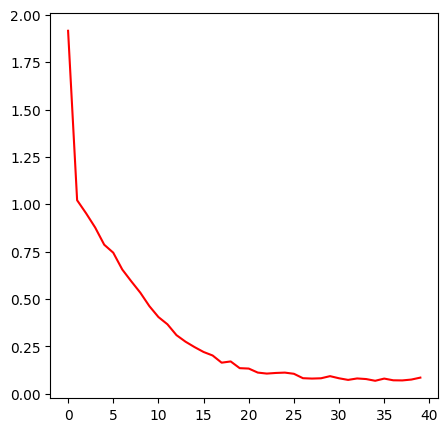

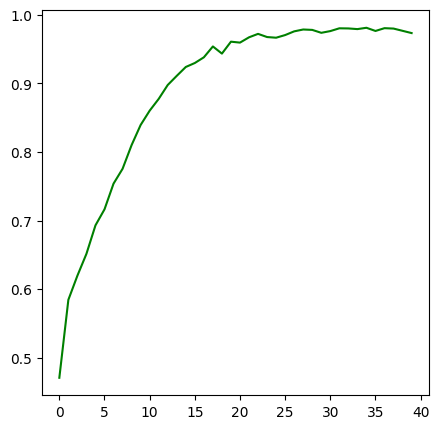

In [133]:
info=history.history 
info

#LOSS VIZULATIZATION
plt.figure(figsize=(5,5))
plt.plot(info['loss'],color="red",label="loss")
plt.show()

#ACCURACY VIZULIZATION
plt.figure(figsize=(5,5))
plt.plot(info['accuracy'],color="green",label="loss")

plt.show()

# quantum_data_for_test_images

In [135]:
#call qsdl
quantum_data_test=qsdl(test_images[:])

Quantum data created


# metrics evalution  over predictions made by test data

In [147]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


predictions = model.predict([test_images[:], quantum_data_test[:]])

predicted_labels = np.argmax(predictions, axis=1)

print(predicted_labels) 

#printing classes

Actual={0:"Mild",1:"Moderate",2:"No_DR",3:"Proliferate_DR",4:"Severe"}

for i in predicted_labels:
    print("The class of the image is -->",Actual[i])
    

# Calculate precision, recall, F1 score, and accuracy
precision = precision_score(test_labels[:], predicted_labels, average='weighted')
recall = recall_score(test_labels[:], predicted_labels, average='weighted')
f1 = f1_score(test_labels[:], predicted_labels, average='weighted')
accuracy = accuracy_score(test_labels[:], predicted_labels)

# Print the metrics
print(f"Precision:{precision*100:.2f}%")
print(f"Recall:{ recall*100:.2f}%")
print(f"F1 Score:{f1*100:.2f}%")
print(f"Accuracy: {accuracy*100:.2f}%")


41/41 [==============================] - 3s 59ms/step
[1 2 1 ... 2 3 1]
The class of the image is --> Moderate
The class of the image is --> No_DR
The class of the image is --> Moderate
The class of the image is --> Mild
The class of the image is --> Proliferate_DR
The class of the image is --> Proliferate_DR
The class of the image is --> Moderate
The class of the image is --> Mild
The class of the image is --> Proliferate_DR
The class of the image is --> Mild
The class of the image is --> Moderate
The class of the image is --> Severe
The class of the image is --> No_DR
The class of the image is --> Proliferate_DR
The class of the image is --> Severe
The class of the image is --> Mild
The class of the image is --> Severe
The class of the image is --> No_DR
The class of the image is --> No_DR
The class of the image is --> Proliferate_DR
The class of the image is --> Severe
The class of the image is --> Moderate
The class of the image is --> Severe
The class of the image is --> Moderate


# Unseen data prediction

In [171]:
images_list=[]
prediction_list=[]
from numpy import *

def pred(name):
    
    #list to hold image 
    unseen=[]
    
    display_image=plt.imread(name)
    
    #load the image
    image=cv2.imread(name)

    #resize the image
    image=cv2.resize(image, (64,64))

    #append the image
    unseen.append(image)

    #converting and normalizing
    unseen_images = np.array(unseen)
    unseen_images = unseen_images.astype('float32') / 255.0

    #call for creating quantum_data for unseen_test_data
    quantum_unseen=qsdl(unseen_images[:1])
    
    
    # Make predictions using the model
    predictions = model.predict([unseen_images[:1], quantum_unseen[:1]])

    # Print the predicted probabilities for each class
    print("Predicted probabilities:")
    #print(predictions)

    # Find the index of the class with the highest predicted probability for each example
    predict_label = np.argmax(predictions, axis=1)

    # Find the maximum predicted label value
    max_predicted_label = np.max(predict_label)

    print("Predicted labels:", predict_label)
    #print("Maximum predicted label:", max_predicted_label)

    Actual={0:"Mild",1:"Moderate",2:"No_DR",3:"Proliferate_DR",4:"Severe"}
    print("The class of the images is-->", Actual[max_predicted_label])

    #plt.imshow(display_image)
    
    images_list.append(display_image)
    prediction_list.append(predict_label)

In [180]:

#loaded model prediticion
for i in range(1,7):
    pred('p'+str(i)+'.png')

Quantum data created
1/1 [==============================] - 0s 102ms/step
Predicted probabilities:
Predicted labels: [0]
The class of the images is--> Mild
Quantum data created
1/1 [==============================] - 0s 87ms/step
Predicted probabilities:
Predicted labels: [1]
The class of the images is--> Moderate
Quantum data created
1/1 [==============================] - 0s 87ms/step
Predicted probabilities:
Predicted labels: [2]
The class of the images is--> No_DR
Quantum data created
1/1 [==============================] - 0s 90ms/step
Predicted probabilities:
Predicted labels: [3]
The class of the images is--> Proliferate_DR
Quantum data created
1/1 [==============================] - 0s 87ms/step
Predicted probabilities:
Predicted labels: [4]
The class of the images is--> Severe
Quantum data created
1/1 [==============================] - 0s 95ms/step
Predicted probabilities:
Predicted labels: [4]
The class of the images is--> Severe


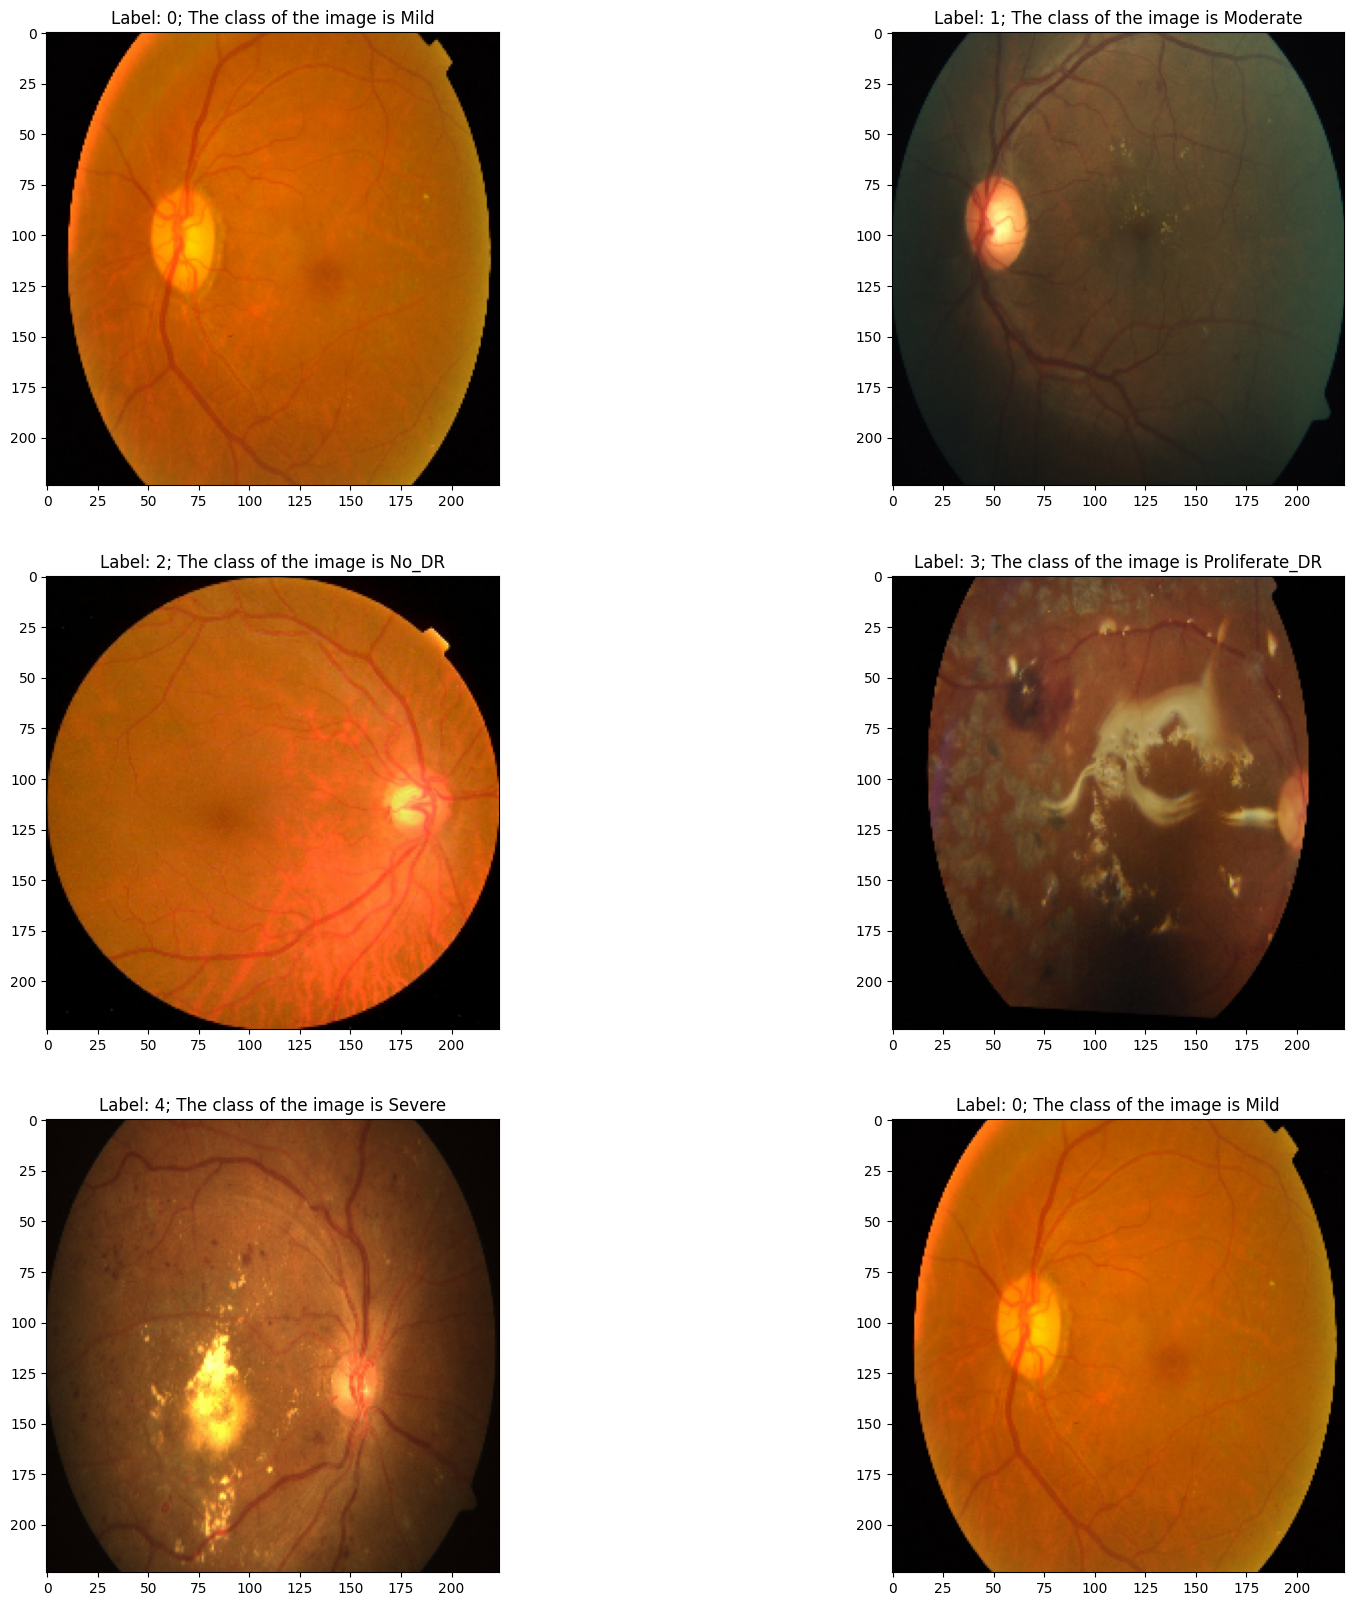

In [181]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,20))
ax=ax.flatten()
for i,j in enumerate(images_list[:6]):
    ax[i].imshow(j) #already in minimal scaled range
    ax[i].title.set_text("Label: "+str(prediction_list[i][0])+"; The class of the image is "+str(Actual[prediction_list[i][0]]))   

In [151]:
model.save('diabetic.keras')